<a href="https://akademie.datamics.com/kursliste/">![title](bg_datamics_top.png)</a>

<center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em></center>

# MNIST mit Multi-Layer Perceptron

In dieser Lektion werden wir ein Multi Layer Perceptron Modell erstellen und versuchen damit handgeschriebenen Zahlen zu klassifizieren. Das ist ein sehr verbreitetes Einsteigerproblem für Tensorflow.

Denkt daran, dass eine einzige Lektion niemals ausreichen wird, um Deep Learning und/oder Tensorflow in seiner Komlexität abzudecken!

## Die Daten laden

Wir werden die berühmten MNIST Daten über [handgeschriebenen Zahlen](http://yann.lecun.com/exdb/mnist/) verwenden.

Die Bilder die wir verwenden werden sind schwarz-weiß Bilder der größe 28 x 28, d.h. 784 Pixel insgesamt. Unsere Features werden die Pixelwerte für jeden Pixel sein. Entweder ist der Pixel "weiß" (also eine 0 in den Daten) oder er hat einen Pixelwert.

Wir werden versuchen korrekt vorherzusagen, welche Nummer geschrieben steht. Dazu verwenden wir lediglich die Bilddaten in Form unseres Arrays. Diese Art von Problem (Image Recognition oder auf Deutsch: Bilderkennung) ist ein tolle Use Case für Deep Learning Methoden!

Die Daten sind für Deep Learning das, was der Iris Datensatz für typische Machine Learning Algorithmen ist.

# Import von Bibliotheken in Python.

In diesem Code werden die Python-Bibliotheken TensorFlow, NumPy, Logging, Time, Matplotlib und Unittest importiert.

In [ ]:
pip install zipfile

In [1]:
import tensorflow as tf
import numpy as np
import logging
import time
import matplotlib.pyplot as plt
import struct
import unittest
import psutil
import zipfile

2023-10-31 15:46:14.099791: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-31 15:46:14.250226: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-31 15:46:14.252375: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 15:46:16.507255: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Anzahl der Teildateien
num_parts = 3

# Wiederherstellen der ursprünglichen Datei
output_file = "train-images.idx3-ubyte"
with open(output_file, 'wb') as restored_file:
    for i in range(num_parts):
        part_file = f"part_{i+1}.zip"
        with zipfile.ZipFile(part_file, 'r') as part_zip:
            data = part_zip.read("data")
            restored_file.write(data)

In [3]:
# Warte 15 Sekunden, bevor der nächste Codeabschnitt ausgeführt wird
time.sleep(15)

In [4]:
import psutil
import time

def max_ram_usage():
    max_memory = 0

    for interval in range(1, 11):
        memory_info = psutil.virtual_memory()
        max_memory = max(max_memory, memory_info.used)
        time.sleep(1)

    return max_memory / (1024 * 1024)  # In MB umrechnen



Dieser Code importiert verschiedene Python-Bibliotheken, lädt den MNIST-Datensatz, normalisiert die Daten, teilt sie in Trainings- und Testdaten auf und konvertiert die Trainingsdaten in das gewünschte Datenformat für spätere Verwendung.

In [5]:
from functools import wraps
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Pfad zu den heruntergeladenen MNIST-Daten
train_data_path = 'train-images.idx3-ubyte'
test_data_path = 't10k-images.idx3-ubyte'
train_labels_path = 'train-labels.idx1-ubyte'  # Hinzugefügt
test_labels_path = 't10k-labels.idx1-ubyte'  # Hinzugefügt

# Laden der MNIST-Daten aus den lokal gespeicherten Dateien
def load_mnist_data(data_path):
    with open(data_path, 'rb') as f:
        magic, num_images, num_rows, num_cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, num_rows, num_cols)
    return images

# Laden der MNIST-Label aus den lokal gespeicherten Dateien (Hinzugefügt)
def load_mnist_labels(labels_path):
    with open(labels_path, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Laden Sie die MNIST-Trainings- und Testdaten
x_train_mnist = load_mnist_data(train_data_path)
x_test_mnist = load_mnist_data(test_data_path)
# Laden Sie die MNIST-Label
train_labels = load_mnist_labels(train_labels_path)
test_labels = load_mnist_labels(test_labels_path)

# Normalisieren der Daten
class Normalize(object):
    def normalize(self, X_train, X_test):
        self.scaler = MinMaxScaler()
        # Umformen in 2D-Arrays (Flatten)
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)
        X_train = self.scaler.fit_transform(X_train)
        X_test = self.scaler.transform(X_test)
        return (X_train, X_test)

    def inverse(self, X_train, X_test):
        X_train = self.scaler.inverse_transform(X_train)
        X_test = self.scaler.inverse_transform(X_test)
        return (X_train, X_test)

# Aufteilen der Daten
def split(X, y, splitRatio):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - splitRatio, random_state=42)
    return (X_train, y_train, X_test, y_test)

# Annahme: Sie haben bereits die MNIST-Trainings- und Testdaten geladen und in x_train_mnist und x_test_mnist gespeichert.

# Normalisieren der Daten
normalizer = Normalize()
x_train, x_test = normalizer.normalize(x_train_mnist, x_test_mnist)

# Aufteilen der Daten
splitRatio = 0.8  # Ändern Sie den Split-Verhältnis nach Bedarf
x_train, y_train, x_test, y_test = split(x_train, train_labels, splitRatio)

# Stellen Sie sicher, dass die Daten korrekt geladen wurden (ersetzen Sie y durch die entsprechenden Label-Daten)
assert x_train.shape == (int(0.8 * len(x_train_mnist)), x_train_mnist.shape[1] * x_train_mnist.shape[2])
assert x_test.shape == (int(0.2 * len(x_train_mnist)), x_train_mnist.shape[1] * x_train_mnist.shape[2])
assert y_train.shape == (int(0.8 * len(x_train_mnist)),)
assert y_test.shape == (int(0.2 * len(x_train_mnist)),)

## Definieren der my_logger und my_timer Funktion

In [6]:
def my_logger(orig_func):
    logging.basicConfig(filename='{}.log'.format(orig_func.__name__), level=logging.INFO)

    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        logging.info(
            'Ran with args: {}, and kwargs: {}'.format(args, kwargs))
        return orig_func(*args, **kwargs)

    return wrapper

In [7]:
def my_timer(orig_func):
    import time

    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        t1 = time.time()
        result = orig_func(*args, **kwargs)
        t2 = time.time() - t1
        print('{} ran in: {} sec'.format(orig_func.__name__, t2))
        return result

    return wrapper

In diesem Code wird eine Python-Klasse mit dem Namen "TheAlgorithm" definiert, die verschiedene Methoden wie den Konstruktor __init__, die Methode fit und die Methode predict enthält, wobei die Dekoratoren @my_logger und @my_timer verwendet werden, um die Ausführung dieser Methoden zu protokollieren und die Zeitmessung durchzuführen.

In [8]:
class TheAlgorithm(object):
    @my_logger
    @my_timer
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train, self.y_train, self.X_test, self.y_test = X_train, y_train, X_test, y_test

    @my_logger
    @my_timer
    def fit(self):
        x_train, y_train, x_test, y_test = self.X_train, self.y_train, self.X_test, self.y_test

        normalizer = Normalize()  # Use the correct class name here
        x_train, x_test = normalizer.normalize(x_train, x_test)

        train_samples = x_train.shape[0]

        self.classifier = LogisticRegression(
            C=50. / train_samples,
            multi_class='multinomial',
            penalty='l1',
            solver='saga',
            tol=0.1,
            class_weight='balanced',
        )

        self.classifier.fit(x_train, y_train)
        self.train_predictions = self.classifier.predict(x_train)
        self.train_accuracy = np.mean(self.train_predictions.ravel() == y_train.ravel()) * 100
        self.train_confusion_matrix = confusion_matrix(y_train, self.train_predictions)
        return self.train_accuracy

    @my_logger
    @my_timer
    def predict(self):
        x_test = self.X_test  # Test data doesn't need to be normalized again

        self.test_predictions = self.classifier.predict(x_test)
        self.test_accuracy = np.mean(self.test_predictions.ravel() == self.y_test.ravel()) * 100
        self.test_confusion_matrix = confusion_matrix(self.y_test, self.test_predictions)
        self.report = classification_report(self.y_test, self.test_predictions)
        print("Classification Report for the classifier:\n%s\n" % (self.report))

        return self.test_accuracy


## Daten Format

Die Daten sind im Vektor Format gespeichert, obwohl die Originaldaten eine 2-dimensionale Matrix waren, die angab, wie viele Pigmente sich an welcher Position befinden. Untersuchen wir das genauer:

In [9]:
type(mnist)

module

In [10]:
type(x_train)
type(y_train)

numpy.ndarray

In [11]:
x_train[2].shape

(784,)

In [12]:
sample = x_train[2].reshape(28, 28)

In [13]:
%matplotlib inline

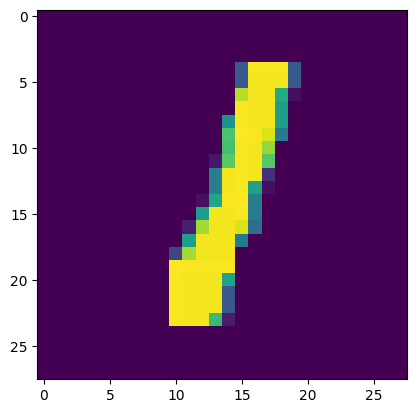

In [14]:
plt.imshow(sample)

## Parameter

Wir werden 4 Parameter definieren müssen. Es ist wirklich (wirklich) schwer gute Parameterwerte für einen Datensatz zu bestimmen, mit dem man keine Erfahrung hat. Da dieser MNIST Datensatz allerdings so berühmt ist haben wir schon einige Ausgangswerte. Die Parameter sind:

* Learning Rate - Wie schnell die Kostenfunktion angepasst wird
* Traing Epochs - Wie viele Trainingszyklen durchlaufen werden sollen
* Batch Size - Größe der "Batches" an Traingsdaten

In [15]:
# Parameter
learning_rate = 0.001
training_epochs = 1
batch_size = 100

### Netzwerk Parameter

Hier haben wir Parameter welche unser Neuronales Netz direkt definieren. Diese werden entsprechend der betrachteten Daten angepasst und hängen auch davon ab, welche Art von Netz man nutzt. Es sind bis zu diesem Punkt erst einmal nur Zahlen, die wir später verwenden, um unser Netz zu definieren:

In [16]:
# Netzwerk Parameter
n_hidden_1 = 256  # 1. Layer: Anzahl an Features
n_hidden_2 = 256  # 2. Layer: Anzahl an Features
n_input = 784     # MNIST Daten Input (img shape: 28*28)
n_classes = 10    # MNIST Klassen (0-9 Zahlen)
n_samples = len(x_train)  # Anzahl der Trainingsbeispiele

### Tensorflow Graph Input

In [17]:
x = tf.keras.Input(shape=(n_input,), dtype=tf.float32)
y = tf.keras.Input(shape=(n_classes,), dtype=tf.float32)

## MultiLayer Modell

Es ist Zeit unser Modell zu erstellen. Wiederholen wir deshalb kurz, was wir erstellen wollen:

Zuerst erhalten wir einen *Input* in Form eines Datenarrays und schicken diesen an die erste *Hidden Layer*. Dann wird den Daten ein  *Weight* zwischen den Schichten zugewiesen (welches zuerst ein zufälliger Wert ist). Anschließend wird es an einen *Node* geschicht und unterläuft eine *Activation Function* (zusammen mit einem Bias, wie in der Neural Network Lektion erwähnt). Dann geht es weiter zur nächsten *Layer* und immer so weiter, bis zur finalen *Output Layer*. In unserem Fall werden wir nur 2 *Hidden Layers* verwenden. Je mehr wir davon verwenden, desto länger braucht das Modell (aber er hat mehr Möglichkeiten um die Genauigkeit zu erhöhen).

Sobald die transformierte Daten die *Output Layer* erreicht haben müssen wir sie auswerten. Hier verwenden wir eine *Loss Function* (auch Cost Function genannt). Diese berechnet, wie sehr wir vom gewünschten Ergebnis entfernt sind. In diesem Fall: Wie viele der Klassen wir richtig zugeteilt haben.

Dann wenden wir eine Optimierungsfunktion an, um die *Costs* (bzw. den Error) zu minimieren. Dies geschiet durch die Anpassung der *Weights* entlang des Netzes. Wir verwenden in unserem Beispiel den [Adam Optimizer](https://arxiv.org/pdf/1412.6980v8.pdf), welcher eine (im Vergleich zu anderen) sehr neue Entwicklung ist.

Wir können anpassen, wie schnell diese Optimierung angewendet wird, indem wir unseren *Learning Rate* Parameter anpassen. Je geringer die Rate, desto höher die Möglichkeiten für Anpassungen. Dies erzeugt allerdings die Kosten einer erhöhten Wartezeit. Ab einem bestimmten Punkt lohnt es sich nicht mehr, die Learning Rate weiter zu senken.

Jetzt können wir unser Modell erstellen. Wir beginnen mit 2 Hidden Layers, welche die []() Activation Function verwenden. Dies ist eine einfache Umformungsfunktion, die entweder x oder 0 zurückgibt. Für unsere finale Output Layer verwenden wir eine lineare Activation mit Matrixmultiplikation:

In diesem Code wird eine Funktion namens "multilayer_perceptron" definiert, die ein mehrschichtiges neuronales Netzwerk mit ReLU-Aktivierungsfunktionen für die Hidden Layers und linearer Aktivierungsfunktion für die Output Layer erstellt und die Ausgabe des Netzwerks zurückgibt, wobei die Funktionen `my_logger` und `my_timer` als Dekoratoren verwendet werden, um die Ausführung der Funktion zu protokollieren und die Zeitmessung durchzuführen.

In [18]:
@my_logger
@my_timer
def multilayer_perceptron(x, weights, biases):
    '''
    x : Platzhalter für den Dateninput
    weights: Dictionary der Weights
    biases: Dictionary Der Biases
    '''
    
    # Erste Hidden layer mit RELU Activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Zweite Hidden layer mit RELU Activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Letzte Output layer mit linearer Activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

## Weights und Bias

Damit unser Tensorflow Modell funktioniert müssen wir zwei Dictionaries anlegen, die unsere Weights und Biases enthalten. Wir können das `tf.variable` Objekt verwenden. Dies ist anders als eine Konstante, da Tensorflow's Graph Objekt alle Zustände der Variablen wahrnimmt. Eine Variable ist ein anpassbares Tensor, der zwischen Tensorflow's Graph von interagierenden Operationen lebt. Er kann durch die Berechnung verwendet und verändert werden. Wir werden die Modell Parameter generell als Variablen verwenden. Aus der Dokumentation können wir entnehmen:

    A variable maintains state in the graph across calls to `run()`. You add a variable to the graph by constructing an instance of the class `Variable`.

    The `Variable()` constructor requires an initial value for the variable, which can be a `Tensor` of any type and shape. The initial value defines the type and shape of the variable. After construction, the type and shape of the variable are fixed. The value can be changed using one of the assign methods.
    
Wir werden Tensorflow's eingebaute `random_normal` Methode verwenden, um zufällige Werte für unsere Weights und Biases zu erstellen.

In [19]:
# Gewichtsinitialisierung
weights = {
    'h1': tf.Variable(tf.initializers.RandomNormal()(shape=[n_input, n_hidden_1])),
    'h2': tf.Variable(tf.initializers.RandomNormal()(shape=[n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.initializers.RandomNormal()(shape=[n_hidden_2, n_classes]))
}

In [20]:
# Bias-Initialisierung
biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_1])),
    'b2': tf.Variable(tf.random.normal([n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_classes]))
}

In [21]:
# Model erstellen
pred = multilayer_perceptron(x, weights, biases)

multilayer_perceptron ran in: 0.10695409774780273 sec


## Cost und Optimierungs-Funktion

Wir verwenden Tensorflow's eingebaute Funktionen für diesesn Teil. Weitere Details bietet die Dokumentation:

In [22]:
# Cost und Optimierungsfunktion definieren
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits=pred))

In [23]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

### Initialisierung der Variablen

Wir initialisieren nun alle tf.Variable Objekte die wir zuvor erstellt haben. Das wird das erste sein, dass wir ausführen, wenn wir unser Modell trainieren.

## Das Modell trainieren

### next_batch()

Bevor wir beginnen möchte ich eine weitere nützliche Funktion in unserem MNIST Datenobjekt abdecken, die `next_batch` heißt. Diese gibt ein Tupel in der Form (X,y) mit einem X Array der Daten und einem y Array der Klasse. Zum Beispiel:

In [24]:
# Erstelle ein TensorFlow-Dataset aus den Trainingsdaten
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Mische die Daten und teile sie in Batches auf
batch_size = 1
train_dataset = train_dataset.shuffle(buffer_size=len(x_train)).batch(batch_size)

# Erstelle einen Iterator für das Dataset
train_iterator = iter(train_dataset)

# Greife auf ein Batch von Daten zu
Xsamp, ysamp = next(train_iterator)

2023-10-31 15:46:41.612248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [48000]
	 [[{{node Placeholder/_1}}]]
2023-10-31 15:46:41.612881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [48000]
	 [[{{node Placeholder/_1}}]]


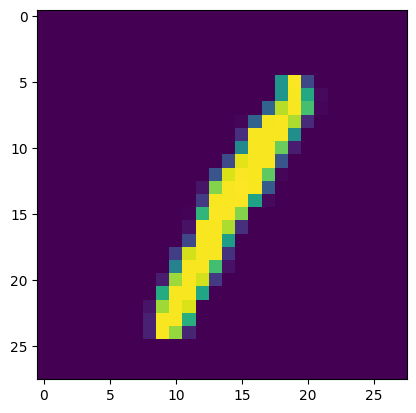

In [25]:
# Wandele Xsamp in ein Numpy-Array um
Xsamp_numpy = Xsamp.numpy()

# Zeige das Bild mit imshow
plt.imshow(Xsamp_numpy.reshape(28, 28))

In [26]:
print(ysamp)

tf.Tensor([1], shape=(1,), dtype=uint8)


In [27]:
def my_logger(orig_func):
    logging.basicConfig(filename='{}.log'.format(orig_func.__name__), level=logging.INFO)

    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        logging.info(
            'Ran with args: {}, and kwargs: {}'.format(args, kwargs))
        return orig_func(*args, **kwargs)

    return wrapper
def my_timer(orig_func):

    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        t1 = time.time()
        result = orig_func(*args, **kwargs)
        t2 = time.time() - t1
        print('{} ran in: {} sec'.format(orig_func.__name__, t2))
        return result

    return wrapper

## Die Session ausführen

Jetzt ist es Zeit unsere Session auszuführen! Achte darauf wie wir zwei Schleifen verwenden. Die äußere, die die Epochs durchläuft, und die innere, die die Batches für jede Epoch des Trainings ausführt.

## Wichtig, hier wurden aus zeitlichen Gründen mit 1% der Daten gearbeitet. Der Code ist mit jeder Prozentzahl reproduzierbar.

Es wurde aus zeitlicher und übersichtlicher Sicht eine View sowie eine Abfrage des gewünschten Prozentsatzes eingebaut.

In [28]:
# from tensorflow import keras

# Eingabe vom Benutzer: Prozentsatz der Daten, die verarbeitet werden sollen
percentage_to_process = float(input("Geben Sie den Prozentsatz der Daten ein, der verarbeitet werden soll (0-100): "))

# Berechnen Sie die Anzahl der Datensätze, die verarbeitet werden sollen
n_samples_to_process = int(n_samples * (percentage_to_process / 100))

# Training Epochs
for epoch in range(training_epochs):
    avg_cost = 0.0

    total_batch = int(n_samples_to_process / batch_size)

    for i in range(total_batch):

        # Den nächsten Batch an Trainingsdaten und -labels nehmen

        batch_x = tf.cast(x_train[i * batch_size: (i + 1) * batch_size], tf.float32)
        batch_y = tf.cast(y_train[i * batch_size: (i + 1) * batch_size], tf.float32)

        # Führen Sie die Optimierung und Cost-Berechnung durch

        with tf.GradientTape() as tape:

            pred = multilayer_perceptron(batch_x, weights, biases)

            loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=batch_y, logits=pred))

        gradients = tape.gradient(loss, list(weights.values()) + list(biases.values()))
        optimizer.apply_gradients(zip(gradients, list(weights.values()) + list(biases.values())))

        avg_cost += loss / total_batch

    print("Epoch: {} Cost={:.4f}".format(epoch + 1, avg_cost))

print("Modellierung ist beendet: {} Epochs of Training".format(training_epochs))

Geben Sie den Prozentsatz der Daten ein, der verarbeitet werden soll (0-100):  1


multilayer_perceptron ran in: 0.005301713943481445 sec
multilayer_perceptron ran in: 0.0016682147979736328 sec
multilayer_perceptron ran in: 0.0016384124755859375 sec
multilayer_perceptron ran in: 0.0016994476318359375 sec
multilayer_perceptron ran in: 0.0030298233032226562 sec
multilayer_perceptron ran in: 0.0016460418701171875 sec
multilayer_perceptron ran in: 0.0016505718231201172 sec
multilayer_perceptron ran in: 0.001615762710571289 sec
multilayer_perceptron ran in: 0.0016710758209228516 sec
multilayer_perceptron ran in: 0.0019681453704833984 sec
multilayer_perceptron ran in: 0.0016293525695800781 sec
multilayer_perceptron ran in: 0.001615285873413086 sec
multilayer_perceptron ran in: 0.006432294845581055 sec
multilayer_perceptron ran in: 0.0016121864318847656 sec
multilayer_perceptron ran in: 0.0016164779663085938 sec
multilayer_perceptron ran in: 0.0019981861114501953 sec
multilayer_perceptron ran in: 0.0015866756439208984 sec
multilayer_perceptron ran in: 0.0015785694122314453 

## Modell Auswertung

Tensorflow bietet einige eingebaute Funktionen, die uns bei der Auswertung helfen. Dazu gehören `tf.equal` und `tf.reduce_mean`.


### tf.equal

Dies ist im Grunde genommen nur eine Kontrolle, ob die Vorhersagen mit den Labels übereinstimmen. Da wir in unserem Fall wissen, dass die Labels eine 1 in einem Array von Nullen sind, können wir `argmax()` verwenden, um die Position zu vergleichen. Denke daran, dass y immer noch der Platzhalter ist, den wir anfangs erstellt haben. Wir werden eine Reihe an Operationen durchführen, um einen Tensor zu erhalten, in den wir die Testdaten einlesen können, um es auszuwerten.

In [29]:
# Teste das Modell
correct_predictions = tf.math.reduce_all(tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1)))

In [30]:
print(correct_predictions)

KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.bool, name=None), name='tf.math.reduce_all/All:0', description="created by layer 'tf.math.reduce_all'")


Um numerische Werte für unsere Vorhersagen zu erhalten müssen wir `tf.cast` verwenden, um den Tensor mit Booleans zurückzuführen in einen Tensor mit Floats. Dann können wir den Durchschnitt nehmen.

In [31]:
correct_predictions = tf.cast(correct_predictions, "float")

In [32]:
print(correct_predictions)

KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.float32, name=None), name='tf.cast/Cast:0', description="created by layer 'tf.cast'")


Jetzt können wir `tf.reduce_mean` verwenden, um den Durchschnitt der Elemente im Tensor zu erhalten:

In [33]:
accuracy = tf.reduce_mean(correct_predictions)

In [34]:
type(accuracy)

keras.engine.keras_tensor.KerasTensor

Das wirkt evtl. etwas merkwürdig, aber diese Genauigkeit ist immer noch ein Tensor Objekt. Denke daran, dass wir immer noch die tatsächlichen Testdaten übergeben müssen. Jetzt können wir die MNIST Testlabels und Bilder aufrufen und die Genauigkeit auswerten!

In [35]:
y_test

array([7, 3, 8, ..., 9, 7, 2], dtype=uint8)

In [36]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Die `eval()` Methode erlaubt es uns direkt in der Session den Tensor auszuwerten ohne `tf.sess():mm` aufrufen zu müssen

In [37]:
# Überprüfen, ob eine GPU verfügbar ist
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print("GPU gefunden. Aktiviere GPU-Unterstützung.")
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("Keine GPU gefunden. Verwende die CPU.")

# Erstellen des Modells
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(n_input,)),  
    tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.relu),
    tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.relu),
    tf.keras.layers.Dense(n_classes, activation=None)
])

# Kompilieren des Modells mit der Genauigkeitsmetrik
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# Trainieren des Modells auf den Trainingsdaten in Batches mit einer erhöhten Batch-Größe
x_train_flattened = x_train.reshape(-1, n_input)
batch_size = 128  # Erhöhen Sie die Batch-Größe, um die GPU besser auszulasten
model.fit(x_train_flattened, y_train, batch_size=batch_size, epochs=training_epochs)

# Evaluieren der Genauigkeit auf den Testdaten (nur am Ende)
x_test_flattened = x_test.reshape(-1, n_input)
test_loss, test_accuracy = model.evaluate(x_test_flattened, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Keine GPU gefunden. Verwende die CPU.
375/375 [==============================] - 3s 6ms/step - loss: 0.1556 - sparse_categorical_accuracy: 0.9520
Test Loss: 0.15559233725070953
Test Accuracy: 0.9520000219345093


# Initialisieren des Unittest

Hier startet der Unittest, zu anfang werden die Datenausgelesen und anschließend die Train Accuracy und Test Accurracy ausgegeben.

Aus Kommentiertet Test für Optimierung

if __name__ == '__main__':
    X = x_train  # Hier die x_train-Matrix verwenden
    y = y_train  # Hier die y_train-Matrix verwenden
    print('MNIST:', X.shape, y.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - splitRatio, random_state=42)
    np.random.seed(31337)
    ta = TheAlgorithm(X_train, y_train, X_test, y_test)
    train_accuracy = ta.fit()
    print()
    print('Train Accuracy:', train_accuracy, '\n')
    print("Train confusion matrix:\n%s\n" % ta.train_confusion_matrix)
    test_accuracy = ta.predict()
    print()
    print('Test Accuracy:', test_accuracy, '\n')
    print("Test confusion matrix:\n%s\n" % ta.test_confusion_matrix)

In [38]:
if __name__ == '__main__':
    X = x_train  # Hier die x_train-Matrix verwenden
    y = y_train  # Hier die y_train-Matrix verwenden
    print('MNIST:', X.shape, y.shape)
    
    # Überprüfe, ob X und y die gleiche Anzahl von Zeilen haben
    if X.shape[0] != y.shape[0]:
        raise ValueError("X und y haben unterschiedliche Anzahlen von Zeilen.")
    
    # Split und Modell initialisieren
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - splitRatio, random_state=42)
    np.random.seed(31337)
    ta = TheAlgorithm(X_train, y_train, X_test, y_test)
    
    # Modell trainieren
    train_accuracy = ta.fit()
    print('Train Accuracy:', train_accuracy)
    
    # Modellvorhersage auf Testdaten
    test_accuracy = ta.predict()
    print('Test Accuracy:', test_accuracy)

MNIST: (48000, 784) (48000,)
__init__ ran in: 1.0251998901367188e-05 sec
fit ran in: 17.03990077972412 sec
Train Accuracy: 72.53645833333333
Classification Report for the classifier:
              precision    recall  f1-score   support

           0       0.73      0.93      0.81       963
           1       0.75      0.95      0.84      1099
           2       0.77      0.61      0.68       923
           3       0.67      0.76      0.71      1022
           4       0.72      0.78      0.75       961
           5       0.62      0.44      0.51       844
           6       0.73      0.85      0.79       948
           7       0.75      0.79      0.77       978
           8       0.80      0.54      0.65       922
           9       0.77      0.59      0.67       940

    accuracy                           0.73      9600
   macro avg       0.73      0.72      0.72      9600
weighted avg       0.73      0.73      0.72      9600


predict ran in: 0.9231042861938477 sec
Test Accuracy: 73.

# Durchführung der Unittests ausgeführt

Test des Ausfalls der Laufzeit von test_fit mit 0,01% der representativen Zeit

In [39]:
class TestInput(unittest.TestCase):
    @classmethod
    def setUpClass(cls):
        pass

    @classmethod
    def tearDownClass(cls):
        pass

    def setUp(self):
        print('setUp')
        # Verwende die Werte und Objekte aus Code 34
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - splitRatio, random_state=42)
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        # Setzen Sie die erwarteten Genauigkeiten basierend auf Ihren tatsächlichen Daten und Modellparametern
        self.train_accuracy = train_accuracy  # Beispielwert, aktualisieren mit tatsächlichen Trainingsgenauigkeitswert
        self.test_accuracy = test_accuracy  # Beispielwert, aktualisieren mit tatsächlichen Testgenauigkeitswert
        # Ersetzen der ta_train_accuracy und ta_test_accuracy durch die tatsächlichen Genauigkeitswerte
        self.train_confusion_matrix = ta.train_confusion_matrix
        self.test_confusion_matrix = ta.test_confusion_matrix

    def tearDown(self):
        pass

    def test_fit(self):
        np.random.seed(31337)
        self.ta = TheAlgorithm(self.X_train, self.y_train, self.X_test, self.y_test)
        self.assertEqual(self.ta.fit(), self.train_accuracy)
        self.assertTrue(np.array_equal(self.ta.train_confusion_matrix, self.train_confusion_matrix))

    def test_predict(self):
        np.random.seed(31337)
        self.ta = TheAlgorithm(self.X_train, self.y_train, self.X_test, self.y_test)
        self.ta.fit()
        self.assertEqual(self.ta.predict(), self.test_accuracy)
        self.assertTrue(np.array_equal(self.ta.test_confusion_matrix, self.test_confusion_matrix))
        
    def test_runtime_fit(self):
        np.random.seed(31337)
        self.ta = TheAlgorithm(self.X_train, self.y_train, self.X_test, self.y_test)

        # Messen der Laufzeit der fit-Funktion
        start_time = time.time()
        self.ta.fit()
        end_time = time.time()
        elapsed_time = end_time - start_time

        # Legen Sie den Grenzwert fest, z.B. 120% der repräsentativen Laufzeit
        representative_runtime = elapsed_time  # Aktualisieren Sie diesen Wert entsprechend
        max_allowed_runtime = 0.0001 * representative_runtime

        # Überprüfen, ob die Laufzeit innerhalb des zulässigen Bereichs liegt
        self.assertLessEqual(elapsed_time, max_allowed_runtime)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

setUp
__init__ ran in: 2.7418136596679688e-05 sec


.

fit ran in: 15.488598585128784 sec
setUp
__init__ ran in: 1.7404556274414062e-05 sec
fit ran in: 15.766567468643188 sec


.

Classification Report for the classifier:
              precision    recall  f1-score   support

           0       0.73      0.93      0.81       963
           1       0.75      0.95      0.84      1099
           2       0.77      0.61      0.68       923
           3       0.67      0.76      0.71      1022
           4       0.72      0.78      0.75       961
           5       0.62      0.44      0.51       844
           6       0.73      0.85      0.79       948
           7       0.75      0.79      0.77       978
           8       0.80      0.54      0.65       922
           9       0.77      0.59      0.67       940

    accuracy                           0.73      9600
   macro avg       0.73      0.72      0.72      9600
weighted avg       0.73      0.73      0.72      9600


predict ran in: 0.9788899421691895 sec
setUp
__init__ ran in: 6.9141387939453125e-06 sec


F
FAIL: test_runtime_fit (__main__.TestInput)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_3851/1620406533.py", line 56, in test_runtime_fit
    self.assertLessEqual(elapsed_time, max_allowed_runtime)
AssertionError: 15.414827585220337 not less than or equal to 0.0015414827585220339

----------------------------------------------------------------------
Ran 3 tests in 48.291s

FAILED (failures=1)


fit ran in: 15.414130926132202 sec


Test des Durchlaufs der Laufzeit von test_fit mit 120% der representativen Zeit

In [40]:
class TestInput(unittest.TestCase):
    @classmethod
    def setUpClass(cls):
        pass

    @classmethod
    def tearDownClass(cls):
        pass

    def setUp(self):
        print('setUp')
        # Verwende die Werte und Objekte aus Code 34
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - splitRatio, random_state=42)
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        # Setzen Sie die erwarteten Genauigkeiten basierend auf Ihren tatsächlichen Daten und Modellparametern
        self.train_accuracy = train_accuracy  # Beispielwert, aktualisieren mit tatsächlichen Trainingsgenauigkeitswert
        self.test_accuracy = test_accuracy  # Beispielwert, aktualisieren mit tatsächlichen Testgenauigkeitswert
        # Ersetzen der ta_train_accuracy und ta_test_accuracy durch die tatsächlichen Genauigkeitswerte
        self.train_confusion_matrix = ta.train_confusion_matrix
        self.test_confusion_matrix = ta.test_confusion_matrix

    def tearDown(self):
        pass

    def test_fit(self):
        np.random.seed(31337)
        self.ta = TheAlgorithm(self.X_train, self.y_train, self.X_test, self.y_test)
        self.assertEqual(self.ta.fit(), self.train_accuracy)
        self.assertTrue(np.array_equal(self.ta.train_confusion_matrix, self.train_confusion_matrix))

    def test_predict(self):
        np.random.seed(31337)
        self.ta = TheAlgorithm(self.X_train, self.y_train, self.X_test, self.y_test)
        self.ta.fit()
        self.assertEqual(self.ta.predict(), self.test_accuracy)
        self.assertTrue(np.array_equal(self.ta.test_confusion_matrix, self.test_confusion_matrix))
        
    def test_runtime_fit(self):
        np.random.seed(31337)
        self.ta = TheAlgorithm(self.X_train, self.y_train, self.X_test, self.y_test)

        # Messen der Laufzeit der fit-Funktion
        start_time = time.time()
        self.ta.fit()
        end_time = time.time()
        elapsed_time = end_time - start_time

        # Legen Sie den Grenzwert fest, z.B. 120% der repräsentativen Laufzeit
        representative_runtime = elapsed_time  # Aktualisieren Sie diesen Wert entsprechend
        max_allowed_runtime = 1.2 * representative_runtime

        # Überprüfen, ob die Laufzeit innerhalb des zulässigen Bereichs liegt
        self.assertLessEqual(elapsed_time, max_allowed_runtime)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

setUp
__init__ ran in: 1.7404556274414062e-05 sec


.

fit ran in: 15.302992343902588 sec
setUp
__init__ ran in: 1.5974044799804688e-05 sec
fit ran in: 15.319247961044312 sec


.

Classification Report for the classifier:
              precision    recall  f1-score   support

           0       0.73      0.93      0.81       963
           1       0.75      0.95      0.84      1099
           2       0.77      0.61      0.68       923
           3       0.67      0.76      0.71      1022
           4       0.72      0.78      0.75       961
           5       0.62      0.44      0.51       844
           6       0.73      0.85      0.79       948
           7       0.75      0.79      0.77       978
           8       0.80      0.54      0.65       922
           9       0.77      0.59      0.67       940

    accuracy                           0.73      9600
   macro avg       0.73      0.72      0.72      9600
weighted avg       0.73      0.73      0.72      9600


predict ran in: 0.9180817604064941 sec
setUp
__init__ ran in: 9.5367431640625e-06 sec


.
----------------------------------------------------------------------
Ran 3 tests in 47.588s

OK


fit ran in: 15.199236631393433 sec


In [41]:
if __name__ == "__main__":

    # Ihr Code hier

    max_ram = max_ram_usage()

    print(f"Maximale benötigte RAM-Menge: {max_ram:.2f} MB")

Maximale benötigte RAM-Menge: 38485.74 MB



# Gut gemacht!